# INFO-F-438 - Algorithms in computational biology - 2021

## Assignment 1: The partial digest problem

### Name: Hoang Hai Nam
### M. No.: 443146
Python vers. used and tested : 3.8

Imported libraries: random and itertools, for graphs and tests, timeit and matplotlib

## Pre-requisites
The code below is provided by Prof. John Iacono, it provides imports as well as functions used to graphs runtime and discuss performance later in the file.

For the validation part involving test functions, function test() and test2() are taken directly from the assignment 1 documentation, and any functions that begin with 'test' are also modified derivatives of the 2 aforementioned functions.

In [1]:
import timeit
import matplotlib.pyplot as plt
import random


def plotruntime(f,r,trials=1,figsize=[3,3]):
    Times=[timeit.timeit(lambda:f(n),number=trials)/trials for n in r]
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(r,Times)
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Runtime")
    
def plotruntimes(functions,labels,r,trials=1,figsize=[3,3]):
    fig, ax = plt.subplots(figsize=figsize)
    for f,l in zip(functions,labels):
        Times=[timeit.timeit(lambda:f(n),number=trials)/trials for n in r]
        ax.plot(r,Times,label=l)
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Runtime")
    ax.set_title("Runtime plot: "+str(trials)+" trial"+("s" if trials>1 else ""))
    ax.legend()


# First task: Implementation of Steve Skiena's algorithm

## Imports

In [2]:
import random as rd

## Functions

In [3]:
def RandomCompleteDigest(maxvalue, digestsize):
    """Generates a list of random Complete Digest coordinates of size
       'digestsize' between '0' and 'maxvalue' in sorted order       """
    res = [0, maxvalue]  # defining the poles of the complete digest
    res += rd.sample(range(1, maxvalue), digestsize - 2)  # generation of unique random ints between
    return sorted(res)  # but not including 0 and maxvalue


def PartialDigest(CD):  # WILL BREAK IF INPUT ISN'T SORTED, ASSUME IT IS
    """Generates a list of partial digests from a list of complete digests
        in other words, distances between each value and its bigger values"""
    res = []
    for smol in range(len(CD)):  # loops through all values of CD, smol and big being indexes of small and big value
        big = smol + 1
        while big < len(CD):  # loops through all bigger values than CD[smol]
            res.append(CD[big] - CD[smol])
            big += 1
    return sorted(res)


def delta(pos, plist):
    """returns a list of absolute distances between
    a position and each positions in the list of positions"""
    res = []
    for elem in plist:  # loops through plist and get distance to pos
        res.append(abs(elem - pos))
    return res


def delete(y, L):
    """removes y from list L"""
    if y in L:
        L.remove(y)
    else:
        print("y is not found in L")  # is here mostly for troubleshooting bugs, not needed anymore,
    return


def subquery(qry, mst):
    """Checks to see if a query list is a
    subset of a master list, returns a boolean"""
    mstcp = list(mst)
    if len(mst) > len(qry):  # ran into bugs when 2 lists were equal in size, possibly fixed??? but
        # loops through elements in the query subset, if an element isnt in the list, returns
        for elem in qry:  # have a size check here just in case, not sure if it's size check
            if elem in mstcp:  # that fixed it or a typo fix with list copy operation
                # deletes the element in the copy target lists to deal with duplicates in the subset
                delete(elem, mstcp)
            else:
                return False
    elif len(mst) == len(qry) and sorted(mst) != sorted(qry):  # remedy for bug mentioned above
        return False
    return True


def CompleteDigests(L):
    """Takes in a partial digest as list L and returns a list of sorted
    lists, containing all possible complete digests"""
    # set width and resolution list to be global variable
    global wid, res  # width must be specified as global variable, for res it's not very necessary since
    res = []  # the only operations upon res is append, but defining it within a funciton
    wid = max(L)  # is a bit more neat
    delete(wid, L)
    X = [0, wid]
    Place(L, X)
    return res


def Place(L, X):
    """Recursive functions that tries to solve for position values given a list of 
    distancesL, the function returns when all distances have been filled and L is 
    empty, or if there're no solutions"""
    # sucess state/base case
    # L is empty and solution X is satisfied,
    # returns X to be appended to res
    if not L:
        res.append(sorted(X))
        return
    # takes the maximum(far right) of distance list
    y = max(L)
    # calculates distances from y to X
    dyplist = delta(y, X)
    # checks if list of distances is subset of L
    if subquery(dyplist, L):
        # adds y to X
        X.append(y)
        # remove subset from L
        for elem in dyplist:
            delete(elem, L)
        # recursive call
        Place(L, X)
        # restore original L and X lists, opposites operations as before
        delete(y, X)
        L.extend(dyplist)
    wid_y = abs(wid - y)
    dwhyplist = delta(wid_y, X)
    # same operations as before but with the position being the opposite direction
    if subquery(dwhyplist, L):
        X.append(wid_y)
        for elem in dwhyplist:
            delete(elem, L)
        Place(L, X)
        delete(wid_y, X)
        L.extend(dwhyplist)
    #returns if no possibilities are found
    return

## Testing and Discussion

### Functions

In [4]:
def test(trials, maxvalue, digestsize):
    """Takes in number of trials, complete digest maxvalue and digestsize
    Tests completedigests function, returns(and break) if test failed"""
    for i in range(trials):
        CD = RandomCompleteDigest(maxvalue, digestsize)
        PD = PartialDigest(CD)
        CDs = CompleteDigests(PD)
        if not CD in CDs:
            print("Test Failed")
            return
    print("Test Passed")

In [5]:
def test1maxval(maxvalue):
    for i in range(10):
        CD = RandomCompleteDigest(maxvalue,20)
        PD = PartialDigest(CD)
        CDs = CompleteDigests(PD)
        if not CD in CDs:
            print("Test Failed")
            return
    return

In [6]:
def test1dsize(digestsize):
    for i in range(10):
        CD = RandomCompleteDigest(150,digestsize)
        PD = PartialDigest(CD)
        CDs = CompleteDigests(PD)
        if not CD in CDs:
            print("Test Failed")
            return
    return

### Validation

In [7]:
test(100, 1000, 50)

Test Passed


### Runtime graphing with maxvalue = n (digestsize set to 20)

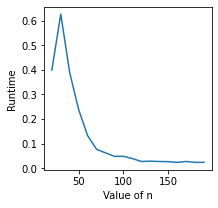

In [8]:
plotruntime(test1maxval, range(20,200,10),10)

### Runtime graphing with digestsize = n (maxvalue set to 150)

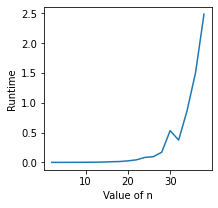

In [10]:
plotruntime(test1dsize, range(2,40,2),6)

### Discussions

As presented in the graphs, the complexity scales up exponentially with digestsize but seem to be the opposite when it comes to maxvalue. This makes sense, as the bulk of the numbers of operations is with the length of the PD list, L. Interestingly as maxvalue increases, complexity and runtime decreases. Even stranger, at least with digestsize = 20, runtime peaks at maxvalue ~ 30.

I could not speculate well as to what causes this, as theoretically the complexity should only scale with the size of the PartialDigest list, which is directly related to the digestsize by the relation len(CD)(len(CD)-1)/2 = len(PD).

My only guess to an explaination is that with higher maxvalue, the further the points in the CD list are far apart and the more unique the PD list become(less duplicates). It is less likely that the recursive function runs into cases with 2 alternatives(left AND right) available at a given point that the function examines, as this can worsen performance.


# Second task: Complete Digests from unique Partial Digest

## Imports

In [34]:
import itertools as it

## Functions

In [12]:
def RemoveMultiplicities(PD):
    """"inputs: PD: list of intergersgiven a list of intergers,
     remove all duplicates and returns a sorted list"""
    return sorted(list(set(PD)))

def PossibleCDs(maxvalue, minsize):
    """Takes in a maxvalue and minimum size and output all possible
     sorted complete digests that are larger than specified minsize"""
    # here maxvalue +2 because for a digest of maxvalue n, the maximum possible size will be n+1\
    res = []
    poles = [0, maxvalue]
    # loop, for each size of CD to max, generate a list of all unique possible combinations 
    for i in range(minsize, maxvalue + 2):  # here i is the size of the CD
        # generates all possible CD combinations(between and not including 0 and maxvalue
        # picking (size-2) out of pool of intergers between 0 and maxvalue
        combs = it.combinations(range(1, maxvalue), i - 2)
        for combination in combs:
            res.append(sorted(list(combination) + poles))
    return res


def CDMinSize(minPD):
    """Assuming that the lowest possible PD size would be the result of
    a lowest possible CD size, calculates the highest minimum CD size"""
    # I couldn't figure out the maths behind to actually implement this improvement
    # but i also assume this will raise the flat efficiency
    pass

def CompleteDigests2(PD):
    """Takes in a partial digest without multiplicities
    as list PD and returns a list of sorted lists,
    containing all possible complete digests
    assuming true length of PD or CD is unknown,
    tests all possible CDs lengths with max size being
    the maximum element of PD"""
    # takes the last indexed value of PD, assuming input is SORTED!!!
    # could use max() here but unecessary if it's sorted
    maxval = PD[-1]
    minsiz = 3
    qrs = PossibleCDs(maxval, minsiz)
    reso = []
    # loops through all CD combinations in comdi, adds compatible ones to the resolution
    for comdi in qrs:
        if RemoveMultiplicities(PartialDigest(comdi)) == PD:
            reso.append(comdi)
    return reso

## Testing and discussions

### Functions

In [13]:
def test2(trials, maxvalue, digestsize):
    for i in range(trials):
        CD = RandomCompleteDigest(maxvalue, digestsize)  # should returns sorted
        PD = PartialDigest(CD)  # sorted output
        PDnoduplicates = RemoveMultiplicities(PD)  # sorted output
        CDs = CompleteDigests2(PDnoduplicates)
        if not CD in CDs:
            print("Test 2 Failed")
            return
    print("Test 2 Passed")

In [14]:
def test2maxval(maxvalue):
    for i in range(4):
        CD = RandomCompleteDigest(maxvalue, 8)  # should returns sorted
        PD = PartialDigest(CD)  # sorted output
        PDnoduplicates = RemoveMultiplicities(PD)  # sorted output
        CDs = CompleteDigests2(PDnoduplicates)
    return

In [15]:
def test2dsize(digestsize):
    for i in range(4):
        CD = RandomCompleteDigest(12, digestsize)  # should returns sorted
        PD = PartialDigest(CD)  # sorted output
        PDnoduplicates = RemoveMultiplicities(PD)  # sorted output
        CDs = CompleteDigests2(PDnoduplicates)
    return

For these 2 functions modified for graphing I remove the list check as the compolexity for that operation scales with the possible CD size and is a considerable bottleneck

### Validation

In [16]:
test2(4, 20, 8)

Test 2 Passed


### Runtime graphing with maxvalue = n (digestsize set to 8)

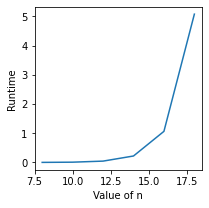

In [78]:
plotruntime(test2maxval, range(8,20,2),3)

### Runtime graphing with digestsize = n (maxvalue set to 12)

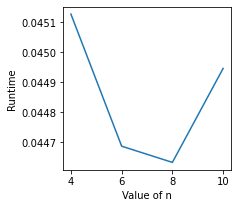

In [35]:
plotruntime(test2dsize, range(4,12,2),2)

Varies everytime you run it, but makes sense, as the original CD's size does not contribute to the main complexity

## Discussion

For CompleteDigests2, I took in 2 things as assumptions, that a CD list will always starts at position 0, and that the final distance of a PD list is the maximum value of a CD list, the second assumption is the result of the first assumption, as one of the distances in the CD will always be maxvalue - 0. Therefore The function uses PossibleCDs to generate all possible combinations of intergers between 0 and maxvalue. PossibleCDs uses the Combination function from itertools to choose 'maxvalue - 2'(compensating for 0 and maxvalue)number of elements from a set of intergers from 0 to max value. This list of possible CD combinations will each be ran through the PartialDigest(CD) function to convert to partial digests, and each time it'll be compared to the input, if the CD's PD matches, it is added to the resolution. This is in theory guarenteed to catch all possible CDs that can result in the PD.

I toyed with the idea of being able to deduce a minimum size of the CD which will decrease the amount of CDs it needs to process by a bit, but in the end I could not implement it without risking missing CDs.

The theoretical difference between CompleteDigest2 and CompleteDigest(1) is that while the first doesn't scale exponentially with maxvalue, CompleteDigest2 does, as the number of possible combinations for a given digestsize are:
with 'maxvalue - 2 = n', 'digestsize - 2 = p':

n!/(p!(n-p)!)

And the function loops through all possible digestsize, from 3 to maxvalue+1
so theoretically the list of all complete digests combinations has the size:

sum(n!/(p!(n-p)!)) with p from 3 to n

While technically digestsize isn't the main bottleneck of CompleteDigest2() unlike CompleteDigest1(), maxvalue scales up not just the complexity but also the digestsize. However the 2 aren't very comparable, as both methods don't resemble eachother in any way.

As expected, this algorithm is extremely unefficient, as such it only practical for very small cases.

In terms of O(n) estimations, it is around O(n!) and worse. There's no point assuming the worst case as the function is exhaustive in nature and will always performs at its worst. 

# Addendum: Demonstrations of each function

## Task 1

In [18]:
rcd = RandomCompleteDigest(100,8)
print(rcd)

[0, 19, 26, 55, 56, 68, 85, 100]


In [19]:
pd = PartialDigest(rcd)
print(pd)

[1, 7, 12, 13, 15, 17, 19, 26, 29, 29, 30, 30, 32, 36, 37, 42, 44, 45, 49, 55, 56, 59, 66, 68, 74, 81, 85, 100]


In [20]:
guesscds = CompleteDigests(pd)
print(guesscds)
print(rcd in guesscds)

[[0, 19, 26, 55, 56, 68, 85, 100], [0, 15, 32, 44, 45, 74, 81, 100]]
True


In [21]:
test(100, 1000, 50)

Test Passed


## Task 2

In [22]:
rcd2 = RandomCompleteDigest(20,8)
print(rcd2)

[0, 4, 5, 13, 15, 18, 19, 20]


In [23]:
pd2 = PartialDigest(rcd2)
print(pd2)

[1, 1, 1, 2, 2, 3, 4, 4, 5, 5, 5, 6, 7, 8, 9, 10, 11, 13, 13, 14, 14, 15, 15, 15, 16, 18, 19, 20]


In [24]:
pdu = RemoveMultiplicities(pd2)
print(pdu)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 20]


In [25]:
cd2guesses = CompleteDigests2(pdu)
print(cd2guesses)

[[0, 1, 4, 6, 11, 19, 20], [0, 1, 9, 14, 16, 19, 20], [0, 1, 2, 4, 5, 9, 15, 20], [0, 1, 2, 4, 7, 10, 15, 20], [0, 1, 2, 4, 7, 11, 15, 20], [0, 1, 2, 4, 9, 10, 15, 20], [0, 1, 2, 4, 9, 11, 15, 20], [0, 1, 2, 4, 10, 11, 15, 20], [0, 1, 2, 5, 7, 10, 16, 20], [0, 1, 2, 5, 7, 15, 16, 20], [0, 1, 2, 5, 9, 15, 16, 20], [0, 1, 2, 6, 7, 9, 16, 20], [0, 1, 2, 6, 9, 15, 16, 20], [0, 1, 2, 7, 9, 10, 16, 20], [0, 1, 2, 7, 10, 11, 16, 20], [0, 1, 4, 5, 6, 11, 19, 20], [0, 1, 4, 6, 9, 11, 19, 20], [0, 1, 4, 6, 10, 11, 19, 20], [0, 1, 4, 6, 11, 14, 19, 20], [0, 1, 4, 6, 11, 15, 19, 20], [0, 1, 4, 9, 11, 14, 19, 20], [0, 1, 5, 9, 14, 16, 19, 20], [0, 1, 6, 9, 11, 16, 19, 20], [0, 1, 6, 9, 14, 16, 19, 20], [0, 1, 9, 10, 14, 16, 19, 20], [0, 1, 9, 11, 14, 16, 19, 20], [0, 1, 9, 14, 15, 16, 19, 20], [0, 4, 5, 11, 14, 18, 19, 20], [0, 4, 5, 11, 15, 18, 19, 20], [0, 4, 5, 13, 15, 18, 19, 20], [0, 4, 9, 10, 13, 18, 19, 20], [0, 4, 10, 11, 13, 18, 19, 20], [0, 4, 10, 13, 15, 18, 19, 20], [0, 4, 11, 13, 14, 1

In [27]:
print(rcd2 in cd2guesses)

True


In [26]:
test2(4, 20, 8)

Test 2 Passed
